In [9]:
#import pytraj as pt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import scienceplots
from scipy.stats import gaussian_kde

plt.style.reload_library()
#plt.style.use('science')
#plt.style.use('no-latex')

plt.rcParams.update({
    "font.family": "sans-serif",   # specify font family here
    "font.serif": ["Helvetica"],  # specify font here
    "font.size":32})          # specify font size here

In [ ]:
#load all replicates of your sims
traj = pt.iterload(['',
                    '',
                    ''],
                    top='')

In [ ]:
#calculate your distances, can also add specific atoms if you are interested in more detail 
#use the cpptraj nomenclature to select which residues (and atoms optionally) you want to measure distance between
distances_a = pt.distance(traj, ':48  :193')
distances_b = pt.distance(traj, ':48  :193')


NameError: name 'distances_a' is not defined

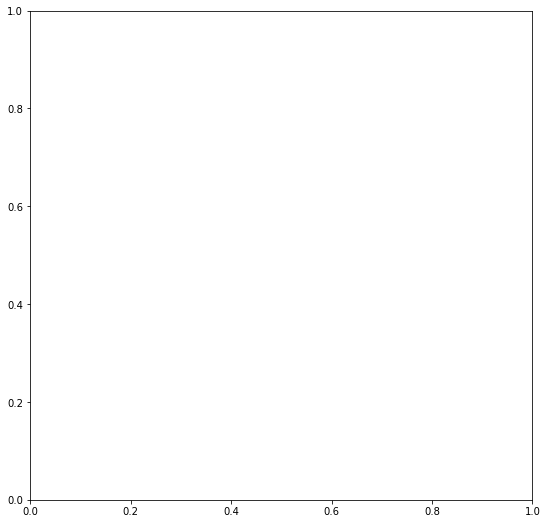

In [10]:
fig, ax = plt.subplots(figsize=(9, 9))

# Create Gaussian KDEs for the datasets (kernel density estimation)
density_a = gaussian_kde(distances_a)
density_b = gaussian_kde(distances_b)

#calculate covariance
xs = np.linspace(0, 32, 200)
density_a.covariance_factor = lambda: .25
density_b._compute_covariance()

#plot distribution lines
ax.plot(xs, density_a(xs), label='a', linewidth=2.5, alpha=0.9, color='blue')
ax.plot(xs, density_b(xs), label='b', linewidth=2.5, alpha=0.9, color='green')
plt.title('title', fontsize=18)

# Fill the area under the curves
ax.fill_between(xs, 0, density_a3b_ligand(xs), color='blue', alpha=0.2) 
ax.fill_between(xs, 0, density_a3b_both(xs), color='green', alpha=0.2)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Increase the axis line width
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3)  # Set axis linewidth

ax.set_xlabel('Distance (\u00C5)', fontsize=30)
ax.set_ylabel('Density', fontsize=30)
ax.legend(fontsize=22)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 25)
ax.tick_params(axis='both', which='major', labelsize=22)
# Increase tick size and thickness
ax.tick_params(axis='both', which='major', size=10, width=2)
# Save the figure 
plt.savefig('file location and name', format='png', dpi=600)

plt.show()